In [2]:
# import libraries

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
 

In [4]:
#global variables
CHANNELS = 3
EPOCHS = 15
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [5]:
# load in data set of images of sports
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'selected_sports',
    shuffle=True,
    image_size= (256,256),
    batch_size= 32
) 

Found 3418 files belonging to 5 classes.


In [6]:
#classified names of sports
class_names = dataset.class_names
class_names

['baseball', 'basketball', 'boxing', 'football', 'volleyball']

2022-12-29 13:31:24.819394: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


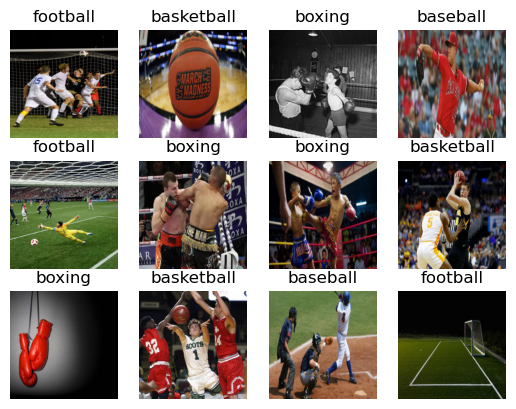

In [7]:
#show a chart 
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
    

In [8]:
train_ds = dataset.take(85)

In [9]:
test_ds = dataset.skip(85)
len(test_ds)

22

In [10]:
val_size = 0.1
len(dataset)*val_size

val_ds = test_ds.take(10)
len(val_ds)

10

In [11]:
test_ds = test_ds.skip(10)
len(test_ds)

12

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
data_augmentation = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
      layers.experimental.preprocessing.RandomRotation(0.2),
])

In [15]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 50

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    train_ds,
    epochs=15,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15
85/85 [==============================] - 68s 799ms/step - loss: 1.0589 - accuracy: 0.5301 - val_loss: 1.0259 - val_accuracy: 0.5531
Epoch 2/15
85/85 [==============================] - 72s 847ms/step - loss: 0.9952 - accuracy: 0.5912 - val_loss: 1.0925 - val_accuracy: 0.5375
Epoch 3/15
85/85 [==============================] - 75s 879ms/step - loss: 0.9124 - accuracy: 0.6261 - val_loss: 0.9052 - val_accuracy: 0.6219
Epoch 4/15
85/85 [==============================] - 73s 858ms/step - loss: 0.8708 - accuracy: 0.6691 - val_loss: 0.8040 - val_accuracy: 0.6844
Epoch 5/15
85/85 [==============================] - 72s 842ms/step - loss: 0.8057 - accuracy: 0.6879 - val_loss: 0.8814 - val_accuracy: 0.6750
Epoch 6/15
85/85 [==============================] - 71s 832ms/step - loss: 0.7531 - accuracy: 0.7132 - val_loss: 0.8066 - val_accuracy: 0.6812
Epoch 7/15
85/85 [==============================] - 86s 1s/step - loss: 0.7020 - accuracy: 0.7309 - val_loss: 0.7059 - val_accuracy: 0.7281
Ep

first image to predict
actual label: basketball
1/1 [==============================] - 0s 293ms/step
predicted label: baseball


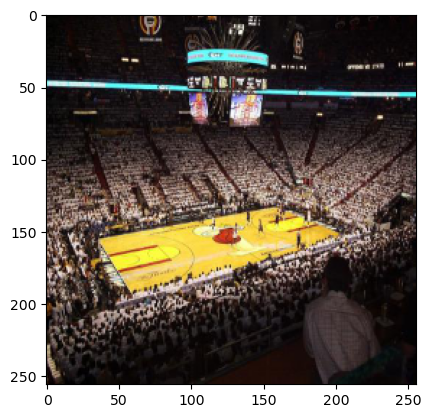

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [23]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 17ms/step


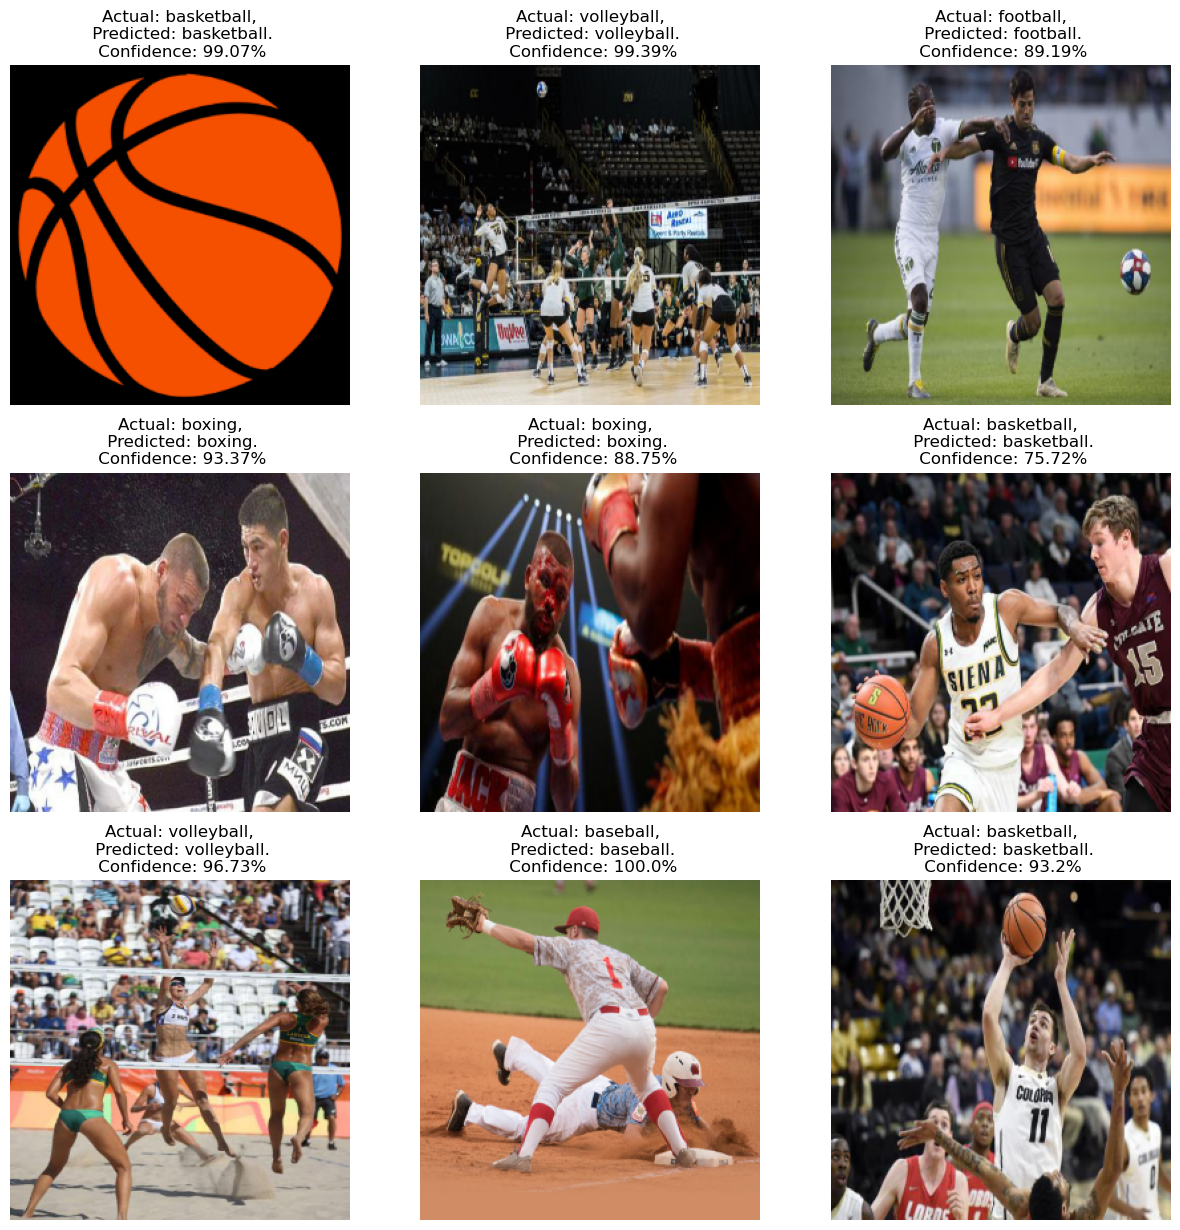

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
scores = model.evaluate(test_ds)

12/12 [==============================] - 4s 301ms/step - loss: 0.7307 - accuracy: 0.7831


In [ ]:
scores

[0.7307265996932983, 0.7830687761306763]

In [33]:
model_version=2

model.save(f'../models/{model_version}')

INFO:tensorflow:Assets written to: ../models/2/assets


INFO:tensorflow:Assets written to: ../models/2/assets


In [34]:
tf.keras.models.save_model(model,'my_model.hdf5')

In [37]:
%%writefile app.py

import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation=True)

def load_model(
    model=tf.keras.models.load_model("/Users/addisonpratt/Desktop/Sports Classifier/my_model.hdf5")

    return model

model=load_model()

st.write("""
    Sports Classification
"""
)

file = st.file_uploader("Please upload an image file", type=["jpg", "png"])

import cv2
from PIL import Image, ImageOps
import numpy as np

def import_and_predict(image_data,model):
    size=(256,256)
    image = ImageOps.fit(image_data,size,Image.ANTIALIAS)
    img = np.asarray(image)
    img_reshape = img[np.newaxis,...]
    prediction = model.predict(img_reshape)

    return prediction

if file is None:
    st.text('Please upload an image file')

else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names=['baseball', 'basketball', 'boxing', 'football', 'volleyball']
    string='This image most likely is: ' + class_names[np.argmax(predictions)]
    st.success(string)




Writing app.py


In [64]:
!ngrok authtoken 2JbeC0IxzYiqtE3gthOWsbtbzZd_7FcEMpJQWrqu4HjiubneY

Authtoken saved to configuration file: /Users/addisonpratt/.ngrok2/ngrok.yml


Run following Code to Start up Web app

In [2]:
# run streamlit app
!nohup streamlit run app.py

appending output to nohup.out
^C


In [56]:
from pyngrok import ngrok

url=ngrok.connect(8501)
url

<NgrokTunnel: "http://bb3f-2604-3d09-1c8a-7d00-e05d-a85c-43e2-d89c.ngrok.io" -> "http://localhost:8501">

In [57]:
!cat /content/nohup.out

cat: /content/nohup.out: No such file or directory
